# Notebook for finding parameters for binary conversion and cell extraction

Extracted cells will be at:  /data02/AZC/AI_XRF/annotated_XRF/raw_cells


<IPython.core.display.Javascript object>


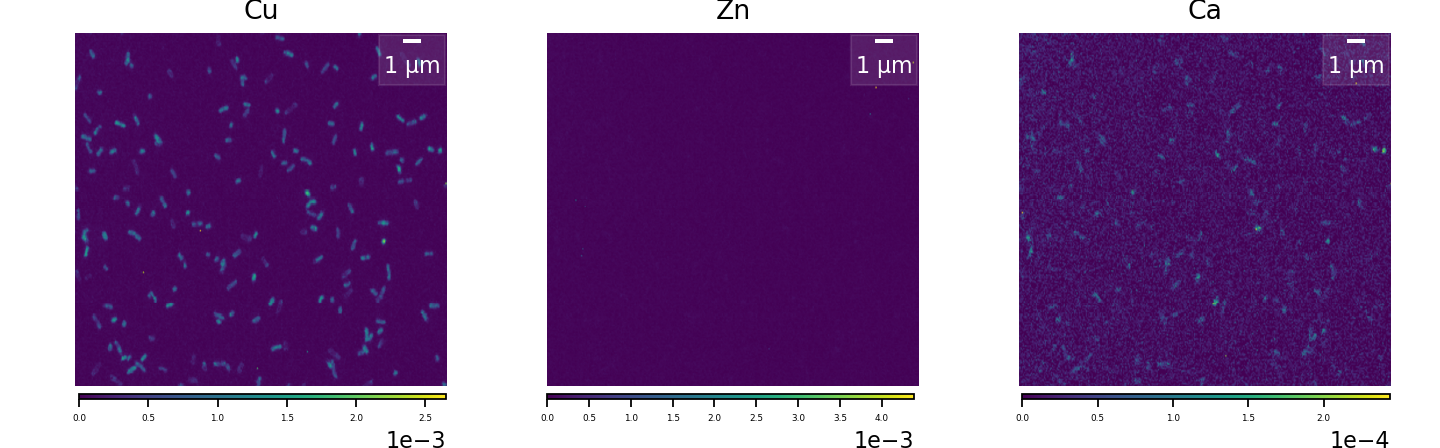

<IPython.core.display.Javascript object>


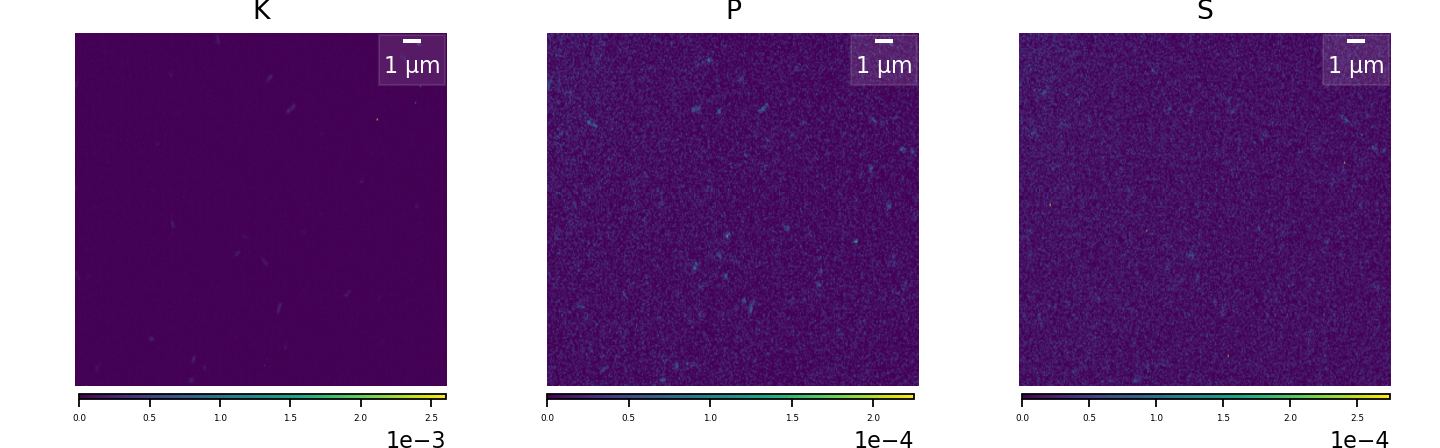

<IPython.core.display.Javascript object>


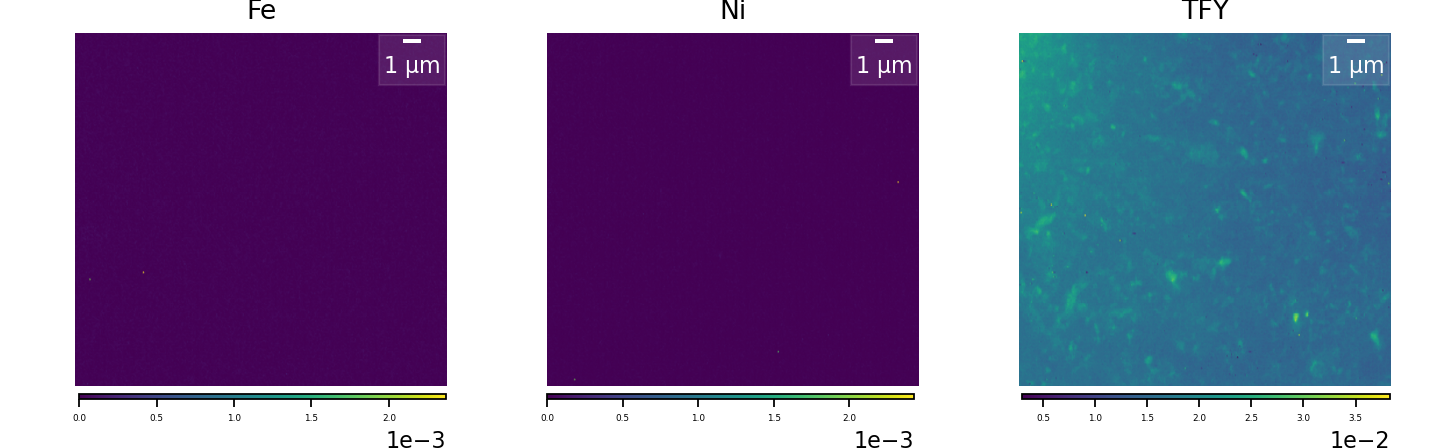

<IPython.core.display.Javascript object>


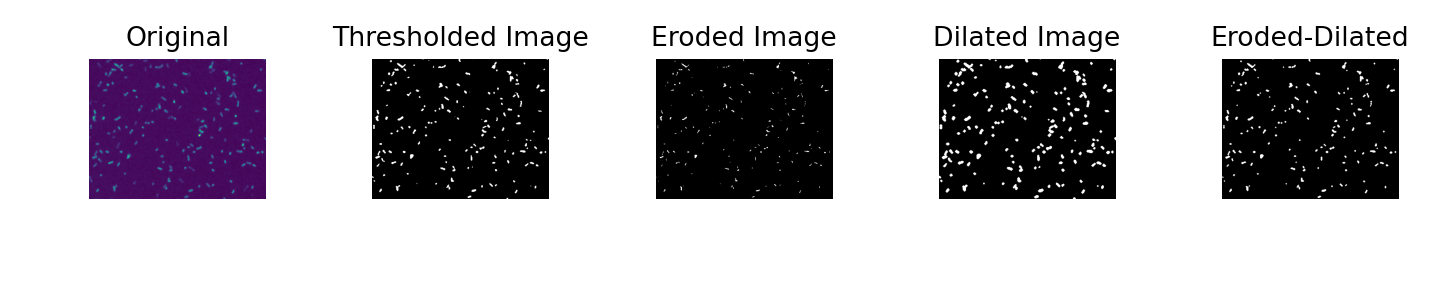

<IPython.core.display.Javascript object>


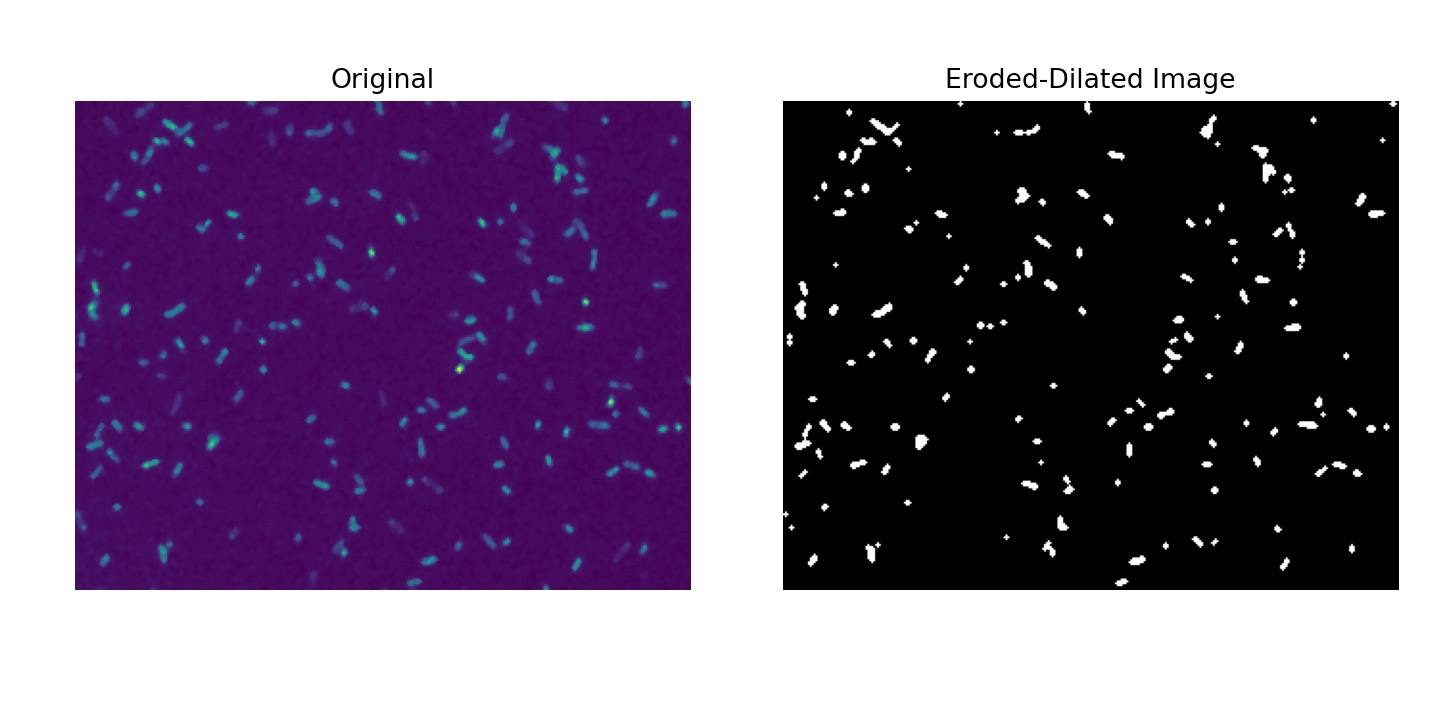

Erosion-Dilation extraction
(28, 28)


In [10]:
import config
from config import *
%matplotlib notebook

print("Extracted cells will be at: ", base__dir_path)

def load_h5(obj):
    global d_Cu, d_Zn, d_Ca, d_K, d_P, d_S,d_Fe, d_Ni, d_TFY
    
    norm_ch = NORM_CH
    value_offset=VALUE_OFFSET
    xrfdata = collections.defaultdict(list)

    with h5py.File(fc.selected, 'r') as dat:
        groups= list(dat.keys())
        maps= list(dat['MAPS'].keys())
        chs = dat['MAPS/channel_names'][:].astype(str).tolist()
#         dat['MAPS/']
#         print(chs)
        w.options=chs
        w.disabled=False
        w1.options=groups
        w1.disabled=False
        w2.options=maps
        w2.disabled=False
        

        btn_bin.disabled=False
        w_bin_elm.disabled=False
        Md_filt_size.disabled=False
        w_bin_type.disabled=False
        
        btn_extract.disabled=False
        crop_width_text.disabled=False
    

        xrf = dat['MAPS/XRF_roi'][:]
#         print(xrf)
        
        scaler_names = dat['MAPS/scaler_names'][:].astype(str).tolist()
        scaler_val = dat['MAPS/scalers'][:]
        norm = scaler_val[scaler_names.index(norm_ch)]
        for e in chs:
            chidx = chs.index(e)
            xrfdata[e].append(xrf[chidx]/norm)
        xrfdata['scan_num'].append(fc.selected_filename)
        xrfdata['x_axis'].append(dat['exchange_4/x_axis'][:])
        xrfdata['y_axis'].append(dat['exchange_4/y_axis'][:])
    xrfdata = pd.DataFrame(xrfdata)
#     print(xrfdata)

    elms=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','TFY']#Default elms
    for i, row in xrfdata.iterrows():
            sc = row['scan_num'][0:row['scan_num'].index('.')]
            for e in elms:
                d = row[e]
                
                d[np.isnan(d) | np.isinf(d)] = 0
                norm_d = (d - np.min(d)) / (np.max(d) - np.min(d)) + value_offset
                ss = np.round(np.abs(np.diff(row['x_axis']))[0], 2)
                if e == 'Cu':
                    d_Cu=d
                    norm_d_Cu=norm_d
                    x_Cu,y_Cu=row['x_axis'], row['y_axis']
                if e == 'Zn':
                    d_Zn=d
                    norm_d_Zn=norm_d
                    x_Zn,y_Zn=row['x_axis'], row['y_axis']
                if e == 'Ca':
                    d_Ca=d
                    norm_d_Ca=norm_d
                    x_Ca,y_Ca=row['x_axis'], row['y_axis']
                if e == 'K':
                    d_K=d
                    norm_d_K=norm_d
                    x_K,y_K=row['x_axis'], row['y_axis']
                if e == 'P':
                    d_P=d
                    norm_d_P=norm_d
                    x_P,y_P=row['x_axis'], row['y_axis']
                if e == 'S':
                    d_S=d
                    norm_d_S=norm_d
                    x_S,y_S=row['x_axis'], row['y_axis']
                    
                if e == 'Fe':
                    d_Fe=d
                    norm_d_Fe=norm_d
                    x_Fe,y_Fe=row['x_axis'], row['y_axis']
                    
                if e == 'Ni':
                    d_Ni=d
                    norm_d_Ni=norm_d
                    x_Ni,y_Ni=row['x_axis'], row['y_axis']
                    
                if e == 'TFY':
                    d_TFY=d
                    norm_d_TFY=norm_d
                    x_TFY,y_TFY=row['x_axis'], row['y_axis']
#     print('Image shape: ',d.shape)
    
    
    
    
    
    ax[0].clear()
    ax[1].clear()
    ax[2].clear()


    ax_row_2[0].clear()
    ax_row_2[1].clear()
    ax_row_2[2].clear()

    ax_row_3[0].clear()
    ax_row_3[1].clear()
    ax_row_3[2].clear()

    
    img1 = ax[0].pcolormesh(x_Cu, y_Cu, d_Cu, shading = 'gouraud')
    ax[0].axis('off')
    scalebar0 = ScaleBar( SCALE_UNIT_FACTOR*(x_Cu[1]-x_Cu[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax[0].add_artist(scalebar0)

    
    img2 = ax[1].pcolormesh(x_Zn, y_Zn, d_Zn, shading = 'gouraud')
    ax[1].axis('off')
    scalebar1 = ScaleBar( SCALE_UNIT_FACTOR*(x_Zn[1]-x_Zn[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax[1].add_artist(scalebar1)

    
    
    img3 = ax[2].pcolormesh(x_Ca, y_Ca, d_Ca, shading = 'gouraud')
    ax[2].axis('off')
    scalebar2 = ScaleBar( SCALE_UNIT_FACTOR*(x_Ca[1]-x_Ca[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax[2].add_artist(scalebar2)

    
    
    ax[0].set_title('Cu')
    ax[1].set_title('Zn')
    ax[2].set_title('Ca')
    fig.canvas.draw()


    fig.show()
    
    img4 = ax_row_2[0].pcolormesh(x_K, y_K, d_K, shading = 'gouraud')
    ax_row_2[0].axis('off')
    scalebar0_row_2 = ScaleBar( SCALE_UNIT_FACTOR*(x_K[1]-x_K[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax_row_2[0].add_artist(scalebar0_row_2)

    
    img5 = ax_row_2[1].pcolormesh(x_P, y_P, d_P, shading = 'gouraud')
    ax_row_2[1].axis('off')
    scalebar1_row_2 = ScaleBar( SCALE_UNIT_FACTOR*(x_P[1]-x_P[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax_row_2[1].add_artist(scalebar1_row_2)

    
    img6 = ax_row_2[2].pcolormesh(x_S, y_S, d_S, shading = 'gouraud')
    ax_row_2[2].axis('off')
    scalebar2_row_2 = ScaleBar( SCALE_UNIT_FACTOR*(x_S[1]-x_S[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax_row_2[2].add_artist(scalebar2_row_2)

    
    ax_row_2[0].set_title('K')
    ax_row_2[1].set_title('P')
    ax_row_2[2].set_title('S')
    
    img7 = ax_row_3[0].pcolormesh(x_Fe, y_Fe, d_Fe, shading = 'gouraud')
    ax_row_3[0].axis('off')
    scalebar0_row_3 = ScaleBar( SCALE_UNIT_FACTOR*(x_Fe[1]-x_Fe[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax_row_3[0].add_artist(scalebar0_row_3)

    
    img8 = ax_row_3[1].pcolormesh(x_Ni, y_Ni, d_Ni, shading = 'gouraud')
    ax_row_3[1].axis('off')
    scalebar1_row_3 = ScaleBar( SCALE_UNIT_FACTOR*(x_Ni[1]-x_Ni[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax_row_3[1].add_artist(scalebar1_row_3)

    
    img9 = ax_row_3[2].pcolormesh(x_TFY, y_TFY, d_TFY, shading = 'gouraud')
    ax_row_3[2].axis('off')
    scalebar2_row_3 = ScaleBar( SCALE_UNIT_FACTOR*(x_TFY[1]-x_TFY[0]), "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax_row_3[2].add_artist(scalebar2_row_3)

    
    ax_row_3[0].set_title('Fe')
    ax_row_3[1].set_title('Ni')
    ax_row_3[2].set_title('TFY')
    
    
    fig.colorbar(img1, cax=cax1, orientation='horizontal')
    fig.colorbar(img2, cax=cax2, orientation='horizontal')
    fig.colorbar(img3, cax=cax3, orientation='horizontal')
    
    
    fig_row_2.colorbar(img4, cax=cax1_row_2, orientation='horizontal')
    fig_row_2.colorbar(img5, cax=cax2_row_2, orientation='horizontal')
    fig_row_2.colorbar(img6, cax=cax3_row_2, orientation='horizontal')
    
    fig_row_3.colorbar(img7, cax=cax1_row_3, orientation='horizontal')
    fig_row_3.colorbar(img8, cax=cax2_row_3, orientation='horizontal')
    fig_row_3.colorbar(img9, cax=cax3_row_3, orientation='horizontal')
    
    fig.colorbar(img1, cax=cax1, orientation='horizontal').ax.tick_params(labelsize=4)
    fig.colorbar(img2, cax=cax2, orientation='horizontal').ax.tick_params(labelsize=4)
    fig.colorbar(img3, cax=cax3, orientation='horizontal').ax.tick_params(labelsize=4)
    
    fig_row_2.colorbar(img4, cax=cax1_row_2, orientation='horizontal').ax.tick_params(labelsize=4)
    fig_row_2.colorbar(img5, cax=cax2_row_2, orientation='horizontal').ax.tick_params(labelsize=4)
    fig_row_2.colorbar(img6, cax=cax3_row_2, orientation='horizontal').ax.tick_params(labelsize=4)
    
    fig_row_3.colorbar(img7, cax=cax1_row_3, orientation='horizontal').ax.tick_params(labelsize=4)
    fig_row_3.colorbar(img8, cax=cax2_row_3, orientation='horizontal').ax.tick_params(labelsize=4)
    fig_row_3.colorbar(img9, cax=cax3_row_3, orientation='horizontal').ax.tick_params(labelsize=4)
    
    
    fig.colorbar(img1, cax=cax1, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig.colorbar(img2, cax=cax2, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig.colorbar(img3, cax=cax3, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    fig_row_2.colorbar(img4, cax=cax1_row_2, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_row_2.colorbar(img5, cax=cax2_row_2, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_row_2.colorbar(img6, cax=cax3_row_2, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    fig_row_3.colorbar(img7, cax=cax1_row_3, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_row_3.colorbar(img8, cax=cax2_row_3, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    fig_row_3.colorbar(img9, cax=cax3_row_3, orientation='horizontal').ax.ticklabel_format(style='sci', scilimits=(-2,2))
    
    
    w_bin_info.disabled=False
    
    Resolution= str((x_Cu[1]-x_Cu[0]))
    
    w_bin_info.value= 'Resolution : ' + Resolution  + ' \n' + 'Image shape: ' +  str(d.shape[0]) + ' x ' + str(d.shape[1]) 
    
    
#     print(fc.selected)
#   no need to print filename
    
    w_status.disabled=False
    
    w_status.value='.h5 file in memory. Choose parameters for binary conversion. \n Data path : \n' + fc.selected 
    

def convert_to_bin(obj):
    global data,binary_ero_dil,masked_data
    
    
    
    if w_bin_type.value=='Erosion-Dilation':
        if w_bin_elm.value=='Cu':
            data = d_Cu
        elif w_bin_elm.value=='Zn':
            data = d_Zn
        elif w_bin_elm.value=='Ca':
            data = d_Ca
        elif w_bin_elm.value=='K':
            data = d_K
        elif w_bin_elm.value=='P':
            data = d_P
        elif w_bin_elm.value=='S':
            data = d_S
        elif w_bin_elm.value=='Fe':
            data = d_Fe
        elif w_bin_elm.value=='Ni':
            data = d_Ni
        elif w_bin_elm.value=='TFY':
            data = d_TFY
        

        data_original=data

        data = ndimage.median_filter(data, size=Md_filt_size.value)


        thresh = threshold_otsu(data)
        binary = data < thresh
        binary = binary^1


        binary_eroded=ndimage.binary_erosion(binary).astype(binary.dtype)
        binary_dilated=ndimage.binary_dilation(binary).astype(binary.dtype)
        binary_ero_dil=ndimage.binary_dilation(binary_eroded).astype(binary_eroded.dtype)

#         print('Erosion-Dilation Processing...')
#         print('Conversion channel: ', w_bin_elm.value)


        ax_ero_dil_process[0].clear()
        ax_ero_dil_process[1].clear()
        ax_ero_dil_process[2].clear()
        ax_ero_dil_process[3].clear()
        ax_ero_dil_process[4].clear()
        

        ax_ero_dil_process[0].imshow(data)
        ax_ero_dil_process[0].set_title('Original')
        ax_ero_dil_process[0].axis('off')

        ax_ero_dil_process[1].imshow(binary, cmap=plt.cm.gray)
        ax_ero_dil_process[1].set_title('Thresholded Image')
        ax_ero_dil_process[1].axis('off')

        ax_ero_dil_process[2].imshow(binary_eroded, cmap=plt.cm.gray)
        ax_ero_dil_process[2].set_title('Eroded Image')
        ax_ero_dil_process[2].axis('off')

        ax_ero_dil_process[3].imshow(binary_dilated, cmap=plt.cm.gray)
        ax_ero_dil_process[3].set_title('Dilated Image')
        ax_ero_dil_process[3].axis('off')

        ax_ero_dil_process[4].imshow(binary_ero_dil, cmap=plt.cm.gray)
        ax_ero_dil_process[4].set_title('Eroded-Dilated')
        ax_ero_dil_process[4].axis('off')



        plt.show()


        #Assign ndimage labels

        labeled_array, num_features = label(binary_ero_dil)
        
        
        
        ax_orig_convt[0].imshow(data);
        ax_orig_convt[0].set_title('Original');
        ax_orig_convt[0].axis('off');

        ax_orig_convt[1].imshow(binary_ero_dil, cmap=plt.cm.gray);
        ax_orig_convt[1].set_title('Eroded-Dilated Image');
        ax_orig_convt[1].axis('off');
        
    elif w_bin_type.value=='k-means':
        if w_bin_elm.value=='Cu':
            data = d_Cu
        elif w_bin_elm.value=='Zn':
            data = d_Zn
        elif w_bin_elm.value=='Ca':
            data = d_Ca
        elif w_bin_elm.value=='K':
            data = d_K
        elif w_bin_elm.value=='P':
            data = d_P
        elif w_bin_elm.value=='S':
            data = d_S
        elif w_bin_elm.value=='Fe':
            data = d_Fe
        elif w_bin_elm.value=='Ni':
            data = d_Ni
        elif w_bin_elm.value=='TFY':
            data = d_TFY
        
        
#         print('k-means Processing...')
#         print('Conversion channel: ', w_bin_elm.value)
        
        n_clusters = 2
        random_state = 52
        k = ClusterAnalysis.kmean_analysis(n_clusters, 
                       data, 
                       random_state, 
                       sigma = None, 
                       cval = None, 
                       plotoption = False, 
                       savefig = None, 
                       fname = None, 
                       figsize=(15,4))

        # since no blue is apply, prepare modify figure and save mask
        mask = k[2]
        masked_data = data * k[2]
        d_str = ['data', 'mask', 'masked_data']
        color = ['gray', 'inferno', 'gray']
        
        #Following code bloc will create extra plots
#         fig, ax = plt.subplots(1,3,figsize=(15,4))
#         for s_, ax_, c_ in zip(d_str, ax, color):
#             img = ax_.imshow(eval(s_), cmap = c_)
#             cbar = fig.colorbar(img, ax = ax_, shrink = 0.8)
#             ax_.set_xticks([])
#             ax_.set_yticks([])
#             ax_.set_title(s_)
#         plt.tight_layout()
        
        ax_ero_dil_process[0].clear()
        ax_ero_dil_process[1].clear()
        ax_ero_dil_process[2].clear()
        ax_ero_dil_process[3].clear()
        ax_ero_dil_process[4].clear()
        
        
        ax_ero_dil_process[0].imshow(data)
        ax_ero_dil_process[0].set_title('Original')
        ax_ero_dil_process[0].axis('off')

        ax_ero_dil_process[2].imshow(mask, cmap='inferno')
        ax_ero_dil_process[2].set_title('mask')
        ax_ero_dil_process[2].axis('off')

        ax_ero_dil_process[4].imshow(masked_data, cmap=plt.cm.gray)
        ax_ero_dil_process[4].set_title('masked_data')
        ax_ero_dil_process[4].axis('off')

        
        
        ax_orig_convt[0].imshow(data);
        ax_orig_convt[0].set_title('Original');
        ax_orig_convt[0].axis('off');

        ax_orig_convt[1].imshow(masked_data, cmap=plt.cm.gray);
        ax_orig_convt[1].set_title('k-means processed');
        ax_orig_convt[1].axis('off');
        
        
        labeled_array, num_features = label(masked_data)
    
    
    w_status.value=  'Processing: ' + str(w_bin_type.value) + '\n' + 'Identified cells: ' + str(num_features) + '\n' +'Conversion channel: ' + str(w_bin_elm.value) + '\n'  + 'Use extract cell button to save extracted cells. '
    
#     print('Number of components (cells) identified: ',num_features)


def extract_cells(obj):
    global BASE_PATCH_WIDTH,Patches,p, cell_save_dir
    BASE_PATCH_WIDTH=crop_width_text.value
    
    if w_bin_type.value=='Erosion-Dilation':    
        print('Erosion-Dilation extraction')
        y_corner_cells, x_corner_cells, y_centers_cells, x_centers_cells = CenterSampling(BASE_PATCH_WIDTH).get_cell_centers(data, 
                                                          binary_ero_dil
                                                          )

        mini_patch_size=(BASE_PATCH_WIDTH,BASE_PATCH_WIDTH)
        print(mini_patch_size)

        widths=np.array([mini_patch_size]*len(x_centers_cells))

        points=np.array([y_corner_cells,x_corner_cells]).T.astype(int)

        
        
    elif w_bin_type.value=='k-means':
#         print('k-means extraction')
        y_corner_cells, x_corner_cells, y_centers_cells, x_centers_cells = CenterSampling(BASE_PATCH_WIDTH).get_cell_centers(data, 
                                                          masked_data
                                                          )

        mini_patch_size=(BASE_PATCH_WIDTH,BASE_PATCH_WIDTH)
#         print(mini_patch_size)

        widths=np.array([mini_patch_size]*len(x_centers_cells))

        points=np.array([y_corner_cells,x_corner_cells]).T.astype(int)
    
    
    
    
    
    p = Patches2D(data.shape, \
                  points=points, \
                  widths=widths, \
                  initialize_by = "data", 
                  )

    Patches = p.extract(data, mini_patch_size)
#         print('No. of patches = ', Patches.shape[0])
        
    
    
    cell_dir_tag=fc.selected_filename
    cell_dir_tag= cell_dir_tag.replace('.h5', '') 
    # print(cell_dir_tag)
    cell_save_dir=os.path.join(base__dir_path, cell_dir_tag)
    # print(cell_save_dir)

    isExist = os.path.exists(cell_save_dir)
    is_Cu_Exist = os.path.exists(os.path.join(cell_save_dir,'Cu'))  
    is_Zn_Exist = os.path.exists(os.path.join(cell_save_dir,'Zn'))  
    is_Ca_Exist = os.path.exists(os.path.join(cell_save_dir,'Ca'))  
    is_K_Exist = os.path.exists(os.path.join(cell_save_dir,'K'))  
    is_P_Exist = os.path.exists(os.path.join(cell_save_dir,'P'))  
    is_S_Exist = os.path.exists(os.path.join(cell_save_dir,'S'))
    is_Fe_Exist = os.path.exists(os.path.join(cell_save_dir,'Fe'))
    is_Ni_Exist = os.path.exists(os.path.join(cell_save_dir,'Ni'))
    is_TFY_Exist = os.path.exists(os.path.join(cell_save_dir,'TFY'))

    if not isExist:
        os.mkdir(cell_save_dir)


    if not is_Cu_Exist:
        os.mkdir(os.path.join(cell_save_dir,'Cu'))
    if not is_Zn_Exist:
        os.mkdir(os.path.join(cell_save_dir,'Zn'))
    if not is_Ca_Exist:
        os.mkdir(os.path.join(cell_save_dir,'Ca'))
    if not is_K_Exist:
        os.mkdir(os.path.join(cell_save_dir,'K'))
    if not is_P_Exist:
        os.mkdir(os.path.join(cell_save_dir,'P'))
    if not is_S_Exist:
        os.mkdir(os.path.join(cell_save_dir,'S'))
    if not is_Fe_Exist:
        os.mkdir(os.path.join(cell_save_dir,'Fe'))
    if not is_Ni_Exist:
        os.mkdir(os.path.join(cell_save_dir,'Ni'))
    if not is_TFY_Exist:
        os.mkdir(os.path.join(cell_save_dir,'TFY'))
    
    
        
        
    #save the patches data structure corresponding to the xrf_image
    patch_tag = fc.selected_filename
    patch_tag = patch_tag.replace('.h5', '_' + 'DEC' + '_' + 'Patches' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value  + '.h5') 
    p.dump(os.path.join(cell_save_dir, patch_tag))

    
    #Extract cells from original Cu Channel data
    Patches_Cu = p.extract(d_Cu, mini_patch_size)
    #Extract cells from original Zn Channel data
    Patches_Zn = p.extract(d_Zn, mini_patch_size)
    #Extract cells from original Ca Channel data
    Patches_Ca = p.extract(d_Ca, mini_patch_size)
    #Extract cells from original K Channel data
    Patches_K = p.extract(d_K, mini_patch_size)
    #Extract cells from original P Channel data
    Patches_P = p.extract(d_P, mini_patch_size)
    #Extract cells from original S Channel data
    Patches_S = p.extract(d_S, mini_patch_size)
    #Extract cells from original Fe Channel data
    Patches_Fe = p.extract(d_Fe, mini_patch_size)
    #Extract cells from original Ni Channel data
    Patches_Ni = p.extract(d_Ni, mini_patch_size)
    #Extract cells from original TFY Channel data
    Patches_TFY = p.extract(d_TFY, mini_patch_size)
    
    
    
    #'DEC' = data element channel
    #'BEC' = conversion element channel
    
    #save extracted cells from each channel to respective folders
    
    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5', '_' + 'DEC' + '_' + 'Cu' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'Cu') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_Cu[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)
    
    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5', '_' + 'DEC' + '_' + 'Zn' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'Zn') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_Zn[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)
    
    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5', '_' + 'DEC' + '_' + 'Ca' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'Ca') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_Ca[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)
    
    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5', '_' + 'DEC' + '_' + 'K' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'K') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_K[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)
    
    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5', '_' + 'DEC' + '_' + 'P' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'P') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_S[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)
    
    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5','_' + 'DEC' + '_' + 'S' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'S') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_S[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)

    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5','_' + 'DEC' + '_' + 'Fe' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'Fe') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_Fe[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)

    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5','_' + 'DEC' + '_' + 'Ni' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'Ni') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_Ni[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)
    
    for idx in range(Patches.shape[0]):    
        cell_tag = fc.selected_filename
        cell_tag = cell_tag.replace('.h5','_' + 'DEC' + '_' + 'TFY' + '_' + w_bin_type.value + '_' + 'BEC' + '_' + w_bin_elm.value + '_' + str(idx) + '.tif') 
    #         print(cell_tag)
        base_path=os.path.join(cell_save_dir,'TFY') + '/'
        tiff_file_name=base_path+cell_tag

        tiff.imsave(file=tiff_file_name, data=Patches_TFY[idx], dtype='float32' );
#     print('Cell images saved at ', base_path)
    
    #copy original image
    #save patches there too.
    copy(fc.selected, cell_save_dir)
    w_status.value=  'Extracted cells: ' + str(Patches.shape[0]) + '\n' + 'Saved cells at: ' + str(cell_save_dir) + '\n'
    



    
fc = FileChooser(default_path)
fc.default_filename = '.h5'
btn_fc = widgets.Button(description = "Load XRF data (.h5)")
w = widgets.Dropdown(options=['Select .h5 file'], description='Element:', disabled=True)
w1 = widgets.Dropdown(options=['Select .h5 file'], description='HDF5:', disabled=True)
w2 = widgets.Dropdown(options=['Select .h5 file'], description='Groups:', disabled=True)
display(HBox(children = [btn_fc,fc]))
display(HBox(children = [w, w1, w2]))




w_bin_info = widgets.Textarea(description='Info.:', 
                             value='File information' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

w_status = widgets.Textarea(description='Status:', 
                             value='Status pane: Select file then click load .h5 file to begin.' ,  
#                              style={'description_width': 'initial'},
                             layout=widgets.Layout(height="auto", width="auto"),
                             disabled=True)

display(HBox(children = [w_bin_info,w_status]))

btn_bin = widgets.Button(description = "Convert", disabled=True)
w_bin_elm = widgets.Dropdown(options=['Cu','Zn','Ca', 'K', 'P', 'S', 'Fe','Ni','TFY'], description='Bin. Elm.:', disabled=True)
w_bin_type = widgets.Dropdown(options=['Erosion-Dilation','k-means'], description='Conv. Type:', disabled=True)
Md_filt_size = widgets.IntText(description = "Md_filt_size", min = 0, max = 10, value = 3, layout = text_width(150), disabled=True)
display(HBox(children = [btn_bin, w_bin_elm,w_bin_type,Md_filt_size]))

btn_extract = widgets.Button(description = "Extract cells", disabled=True)
crop_width_text = widgets.IntText(description = "Crop_width", min = 0, max = 32, value = 28, layout = text_width(150), disabled=True)
display(HBox(children = [btn_extract, crop_width_text]))





global fig, ax, fig_row_2, ax_row_2,fig_row_3, ax_row_3, fig_ero_dil_process, ax_ero_dil_process, fig_orig_convt, ax_orig_convt
global img1,img2,img3, cbar1,cbar2,cbar3

fig, ax = plt.subplots(1,3,figsize=FIGSIZE)
fig.tight_layout()


fig_row_2, ax_row_2 = plt.subplots(1,3,figsize=FIGSIZE)
fig_row_2.tight_layout()

fig_row_3, ax_row_3 = plt.subplots(1,3,figsize=FIGSIZE)
fig_row_3.tight_layout()

cax1 = fig.add_axes(cbar_position1)
cax2 = fig.add_axes(cbar_position2)
cax3 = fig.add_axes(cbar_position3)

cax1_row_2 = fig_row_2.add_axes(cbar_position1)
cax2_row_2 = fig_row_2.add_axes(cbar_position2)
cax3_row_2 = fig_row_2.add_axes(cbar_position3)

cax1_row_3 = fig_row_3.add_axes(cbar_position1)
cax2_row_3 = fig_row_3.add_axes(cbar_position2)
cax3_row_3 = fig_row_3.add_axes(cbar_position3)


cax1.axis('on')
cax2.axis('on')
cax3.axis('on')

cax1_row_2.axis('on')
cax2_row_2.axis('on')
cax3_row_2.axis('on')


cax1_row_3.axis('on')
cax2_row_3.axis('on')
cax3_row_3.axis('on')

# Turn on the axis value for debugging

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')


ax_row_2[0].axis('off')
ax_row_2[1].axis('off')
ax_row_2[2].axis('off')

ax_row_3[0].axis('off')
ax_row_3[1].axis('off')
ax_row_3[2].axis('off')

fig_ero_dil_process, ax_ero_dil_process = plt.subplots(1,5,figsize=(9,1.8))
fig_ero_dil_process.tight_layout()
ax_ero_dil_process = ax_ero_dil_process.ravel()
ax_ero_dil_process[0] = plt.subplot(1, 5, 1)
ax_ero_dil_process[1] = plt.subplot(1, 5, 2, sharex=ax_ero_dil_process[0], sharey=ax_ero_dil_process[0])
ax_ero_dil_process[2] = plt.subplot(1, 5, 3)
ax_ero_dil_process[3] = plt.subplot(1, 5, 4)
ax_ero_dil_process[4] = plt.subplot(1, 5, 5)

fig_orig_convt, ax_orig_convt = plt.subplots(1,2,figsize=(9,4.5))
fig_orig_convt.tight_layout()
ax_orig_convt=ax_orig_convt.ravel()
ax_orig_convt[0] = plt.subplot(1, 2, 1);
ax_orig_convt[1] = plt.subplot(1, 2, 2, sharex=ax_orig_convt[0], sharey=ax_orig_convt[0]);



btn_fc.on_click(load_h5)
btn_bin.on_click(convert_to_bin)
btn_extract.on_click(extract_cells)


In [2]:
#end